In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('/Users/minime/Downloads/ai_financial_market_daily_realistic_synthetic.csv')
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [11]:
# Convert date into datetime format. 
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


# 

### What is the average and median R&D spending, AI revenue, and stock impact for each company?

In [15]:
print(df.groupby('Company')[['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn', 'Stock_Impact_%']]
    .agg(['mean', 'median', 'std']))

        R&D_Spending_USD_Mn                    AI_Revenue_USD_Mn         \
                       mean  median        std              mean median   
Company                                                                   
Google           115.888623  114.50  25.493802         77.880750  73.21   
Meta              72.415294   70.96  15.967262         51.908519  48.55   
OpenAI             7.249595    7.15   1.887350          2.590443   2.33   

                   Stock_Impact_%                   
               std           mean median       std  
Company                                             
Google   39.675361       0.026209   0.02  0.688675  
Meta     26.464372       0.009762  -0.02  0.700750  
OpenAI    1.416351       0.040709   0.01  0.848418  


### Which company is the most efficient at generating AI revenue per dollar of R&D spending?

In [16]:
df_sum = df.groupby('Company')[['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn']].sum()
df_sum['Efficiency_Ratio'] = df_sum['AI_Revenue_USD_Mn'] / df_sum['R&D_Spending_USD_Mn']
print(df_sum.sort_values(by='Efficiency_Ratio', ascending=False))

         R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  Efficiency_Ratio
Company                                                          
Meta               264533.07          189621.82          0.716817
Google             423341.14          284498.38          0.672031
OpenAI              26482.77            9462.89          0.357323


### What is the overall volatility of daily stock impact for each company?

In [17]:
print(df.groupby('Company')['Stock_Impact_%'].std().sort_values(ascending=False))

Company
OpenAI    0.848418
Meta      0.700750
Google    0.688675
Name: Stock_Impact_%, dtype: float64


### Which company has the strongest correlation between AI revenue growth and stock impact?

In [18]:
print(df.groupby('Company').apply(
lambda x: x['AI_Revenue_Growth_%'].corr(x['Stock_Impact_%'])
).sort_values(ascending=False))

Company
OpenAI    0.027633
Meta      0.024149
Google    0.009071
dtype: float64


/var/folders/cw/wz1xbtbs2_b872lv00cfp6rw0000gn/T/ipykernel_1466/1569547153.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('Company').apply(


### How does the total AI revenue for each company trend over time?

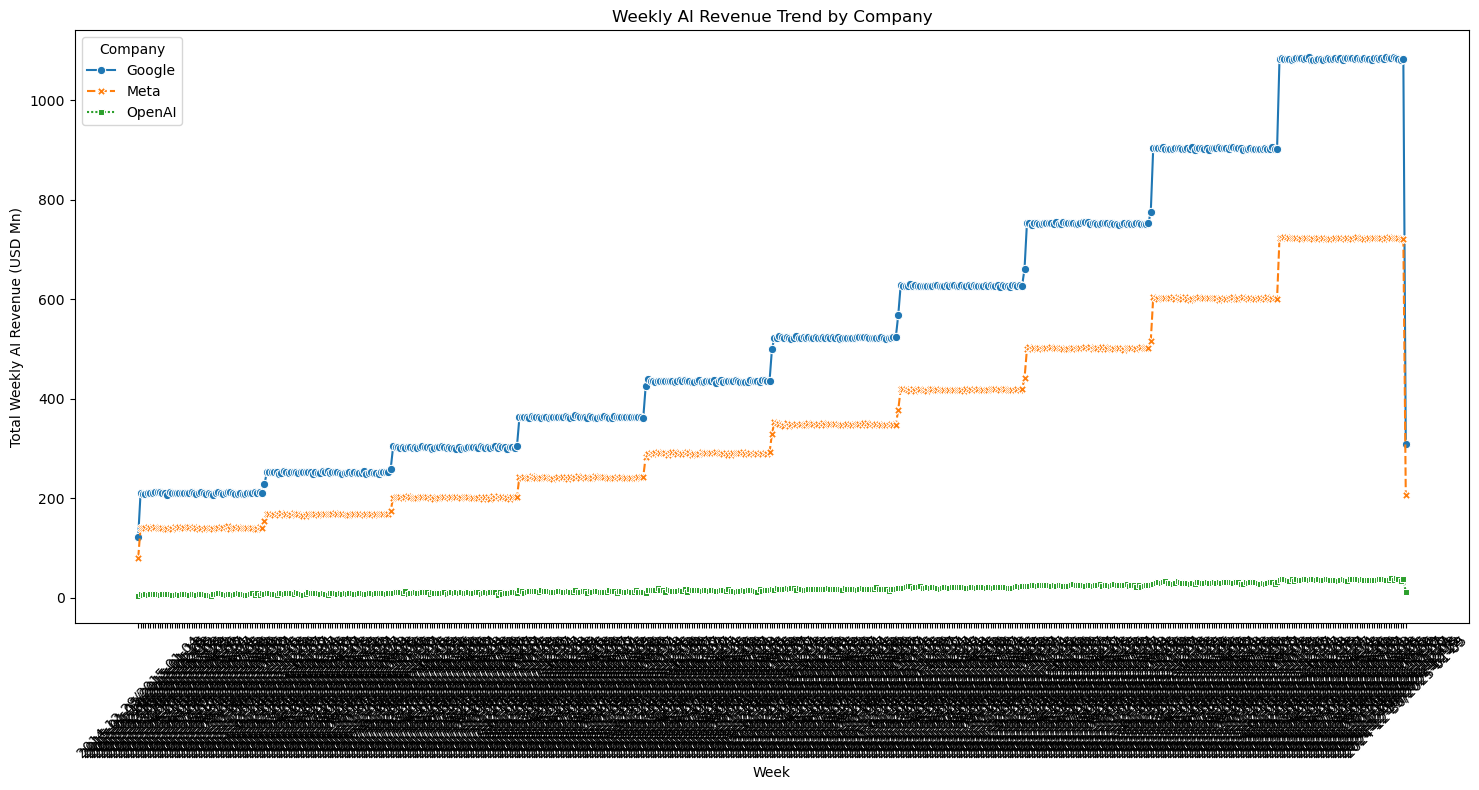

In [19]:
    plt.figure(figsize=(15, 8))
    df['week'] = df['Date'].dt.to_period('W')
    weekly_revenue = df.groupby(['Company', 'week'])['AI_Revenue_USD_Mn'].sum().reset_index()
    weekly_revenue['week'] = weekly_revenue['week'].astype(str) # Convert Period to string for plotting
    sns.lineplot(data=weekly_revenue, x='week', y='AI_Revenue_USD_Mn', hue='Company', style='Company', markers=True)
    plt.title('Weekly AI Revenue Trend by Company')
    plt.xlabel('Week')
    plt.ylabel('Total Weekly AI Revenue (USD Mn)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### What is the cumulative stock impact for each company over time?

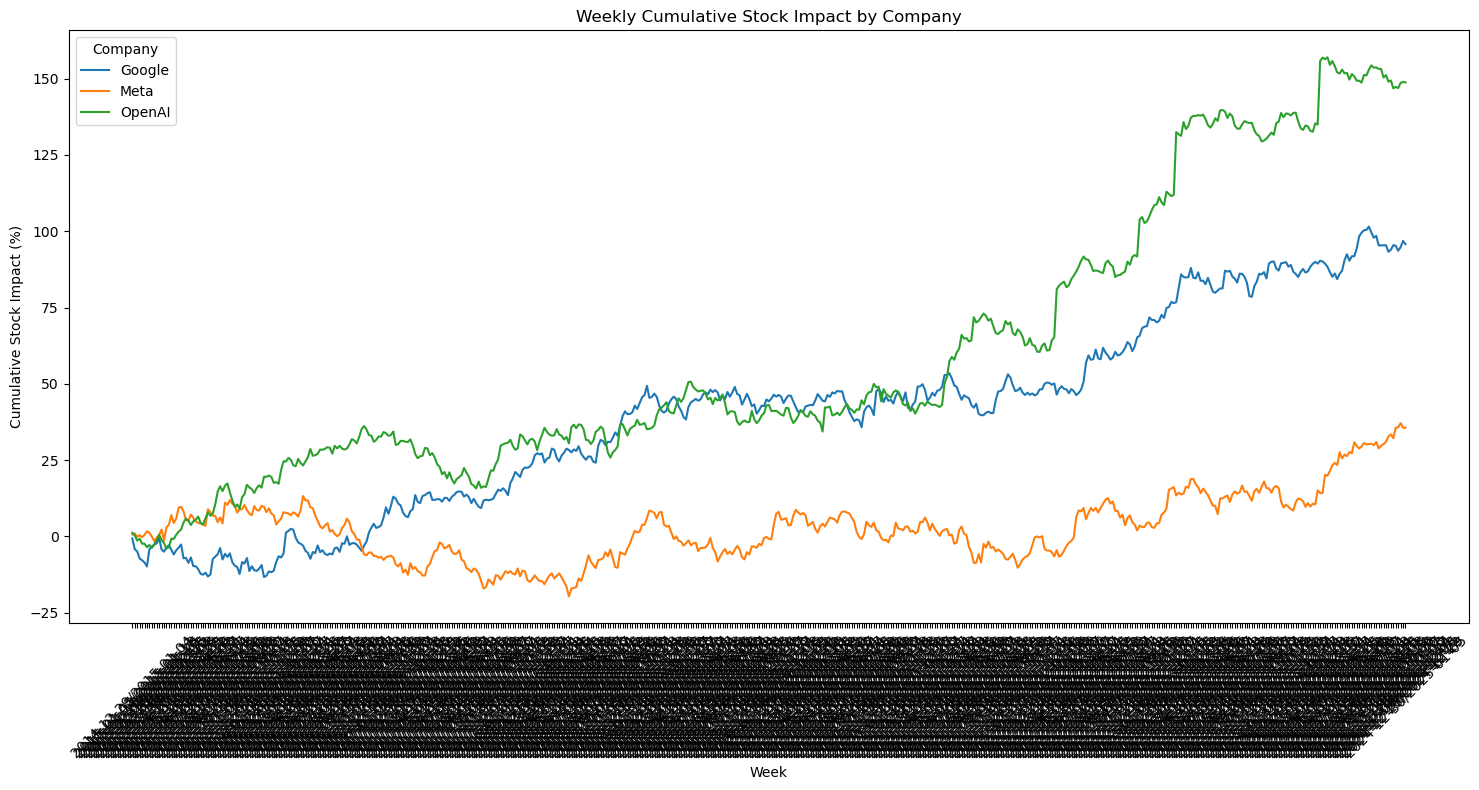

In [20]:
    df_sorted = df.sort_values(by=['Company', 'Date'])
    df_sorted['Cumulative_Stock_Impact'] = df_sorted.groupby('Company')['Stock_Impact_%'].cumsum()
    # Resample to weekly for visualization
    weekly_cumulative = df_sorted.groupby(['Company', 'week'])['Cumulative_Stock_Impact'].last().reset_index()
    weekly_cumulative['week'] = weekly_cumulative['week'].astype(str)
    
    plt.figure(figsize=(15, 8))
    sns.lineplot(data=weekly_cumulative, x='week', y='Cumulative_Stock_Impact', hue='Company')
    plt.title('Weekly Cumulative Stock Impact by Company')
    plt.xlabel('Week')
    plt.ylabel('Cumulative Stock Impact (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### What is the average R&D spending on days with positive AI revenue growth versus days with negative growth for each company?

In [23]:
    df['Growth_Category'] = df['AI_Revenue_Growth_%'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
    print(df.groupby(['Company', 'Growth_Category'])['R&D_Spending_USD_Mn'].mean().unstack())

Growth_Category   Negative    Positive
Company                               
Google           79.960714  117.620585
Meta             49.970000   73.571802
OpenAI            5.447394    7.487505


### On which date did each company have its single highest AI revenue growth day?

In [24]:
top_growth_days = df.loc[df.groupby('Company')['AI_Revenue_Growth_%'].idxmax()]
print(top_growth_days[['Company', 'Date', 'AI_Revenue_Growth_%', 'R&D_Spending_USD_Mn', 
                       'Stock_Impact_%']])

      Company       Date  AI_Revenue_Growth_%  R&D_Spending_USD_Mn  \
6952   Google 2024-01-13               419.88               158.72   
10699    Meta 2024-04-16               423.01                99.35   
3423   OpenAI 2024-05-16               565.50                 8.47   

       Stock_Impact_%  
6952             0.56  
10699            0.75  
3423             0.51  


### What is the distribution of R&D spending for each company?

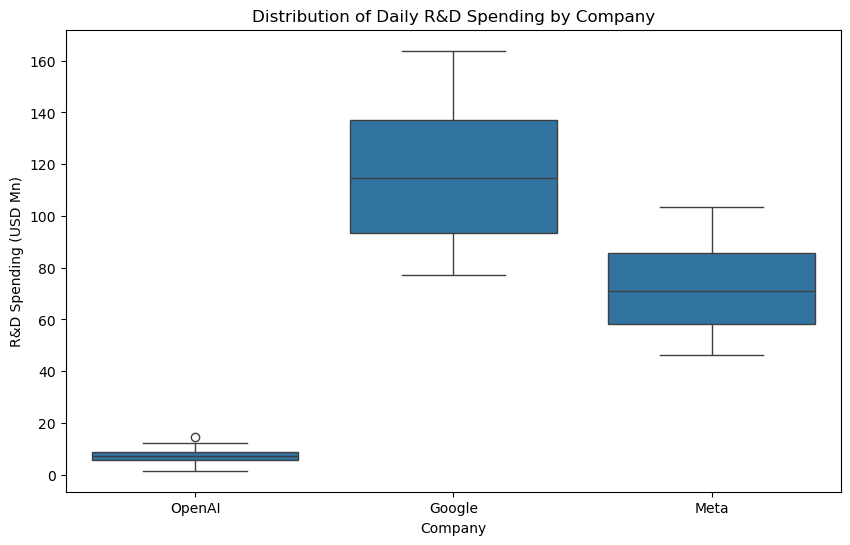

In [25]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Company', y='R&D_Spending_USD_Mn', data=df)
    plt.title('Distribution of Daily R&D Spending by Company')
    plt.ylabel('R&D Spending (USD Mn)')
    plt.show()

### What is the correlation between R&D spending and next-day stock impact for each company?

In [26]:
df['Next_Day_Stock_Impact'] = df.groupby('Company')['Stock_Impact_%'].shift(-1)
print(df.groupby('Company').apply(
lambda x: x['R&D_Spending_USD_Mn'].corr(x['Next_Day_Stock_Impact'])))

Company
Google    0.009656
Meta      0.021720
OpenAI    0.008948
dtype: float64


/var/folders/cw/wz1xbtbs2_b872lv00cfp6rw0000gn/T/ipykernel_1466/345027685.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('Company').apply(


### How many days did each company experience a stock gain versus a loss?

In [27]:
    df['Stock_Gain_Loss'] = df['Stock_Impact_%'].apply(lambda x: 'Gain' if x > 0 else ('Loss' if x < 0 else 'Neutral'))
    print(df.groupby(['Company', 'Stock_Gain_Loss']).size().unstack(fill_value=0))

Stock_Gain_Loss  Gain  Loss  Neutral
Company                             
Google           1859  1775       19
Meta             1767  1866       20
OpenAI           1829  1807       17


### What is the average AI revenue on days with positive versus negative stock impact for each company?

In [28]:
print(df.groupby(['Company', 'Stock_Gain_Loss'])['AI_Revenue_USD_Mn'].mean().unstack())

Stock_Gain_Loss       Gain       Loss    Neutral
Company                                         
Google           78.128042  77.521915  87.207895
Meta             52.349598  51.557851  45.656500
OpenAI            2.610519   2.571079   2.488824


### Are there any specific events that correlated with a significant stock impact for a particular company?

In [29]:
event_impacts = df[df['Event'].notna()][['Company', 'Date', 'Event', 'Stock_Impact_%']]
print(event_impacts)

      Company       Date                            Event  Stock_Impact_%
19     OpenAI 2015-01-20                  Cloud AI launch            2.43
77     OpenAI 2015-03-19          AI ethics policy update            2.80
166    OpenAI 2015-06-16          AI ethics policy update           -1.00
246    OpenAI 2015-09-04         AI-powered search update            2.08
318    OpenAI 2015-11-15      AI Ads Optimization upgrade            3.92
...       ...        ...                              ...             ...
10817    Meta 2024-08-12  AI Video Recommendation upgrade           -1.24
10834    Meta 2024-08-29         AI-powered search update            2.57
10918    Meta 2024-11-21      AI Ads Optimization upgrade            0.51
10926    Meta 2024-11-29    AI speech recognition release           -2.59
10931    Meta 2024-12-04    AI speech recognition release            3.27

[233 rows x 4 columns]


### What is the distribution of AI revenue growth for each company?

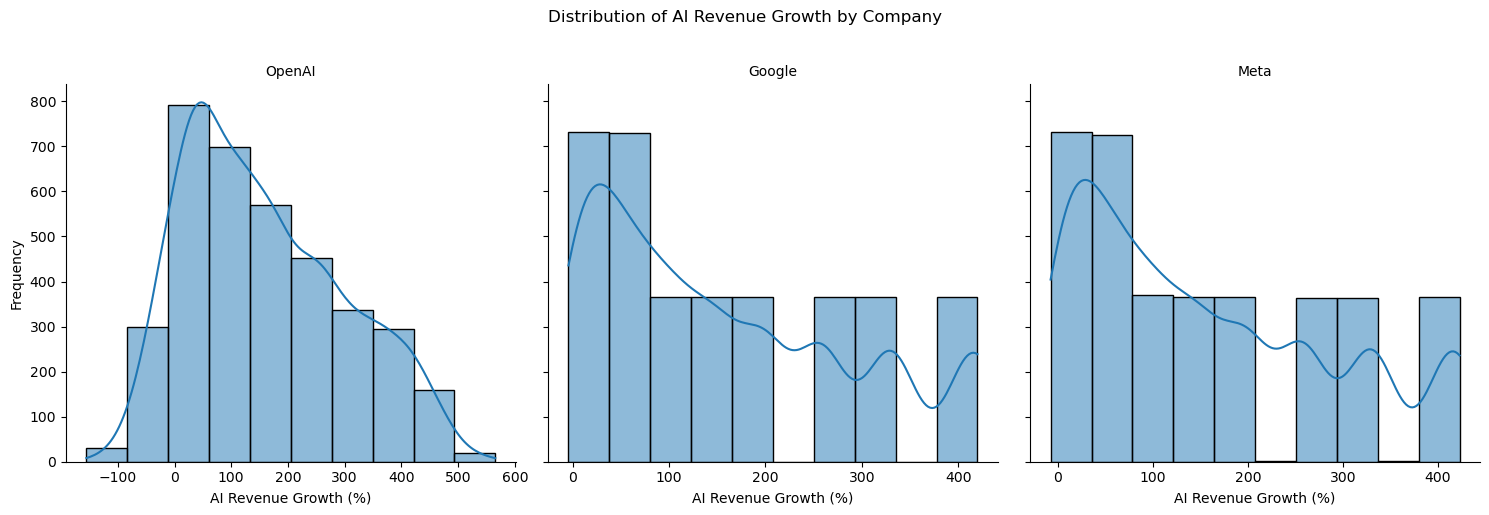

In [30]:
g = sns.FacetGrid(df, col='Company', col_wrap=3, height=5, sharex=False)
g.map(sns.histplot, 'AI_Revenue_Growth_%', bins=10, kde=True)
g.set_axis_labels('AI Revenue Growth (%)', 'Frequency')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of AI Revenue Growth by Company', y=1.02)
plt.tight_layout()
plt.show()

### What is the median R&D spending and AI revenue for each company?

In [31]:
print(df.groupby('Company')[['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn']].median())

         R&D_Spending_USD_Mn  AI_Revenue_USD_Mn
Company                                        
Google                114.50              73.21
Meta                   70.96              48.55
OpenAI                  7.15               2.33


### What is the ratio of total AI Revenue to total R&D spending for each company?

In [32]:
df_sum = df.groupby('Company')[['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn']].sum()
df_sum['Efficiency_Ratio'] = df_sum['AI_Revenue_USD_Mn'] / df_sum['R&D_Spending_USD_Mn']
print(df_sum.sort_values(by='Efficiency_Ratio', ascending=False))

         R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  Efficiency_Ratio
Company                                                          
Meta               264533.07          189621.82          0.716817
Google             423341.14          284498.38          0.672031
OpenAI              26482.77            9462.89          0.357323


### On which days did each company experience the largest single-day stock loss?

In [33]:
worst_days = df.loc[df.groupby('Company')['Stock_Impact_%'].idxmin()]
print(worst_days[['Company', 'Date', 'Stock_Impact_%', 'Event']])

      Company       Date  Stock_Impact_%                        Event
5479   Google 2020-01-01           -2.93          AI partnership deal
10785    Meta 2024-07-11           -2.99      AI ethics policy update
3350   OpenAI 2024-03-04           -3.00  AI Ads Optimization upgrade


### What is the overall correlation matrix for all numerical variables across all companies?

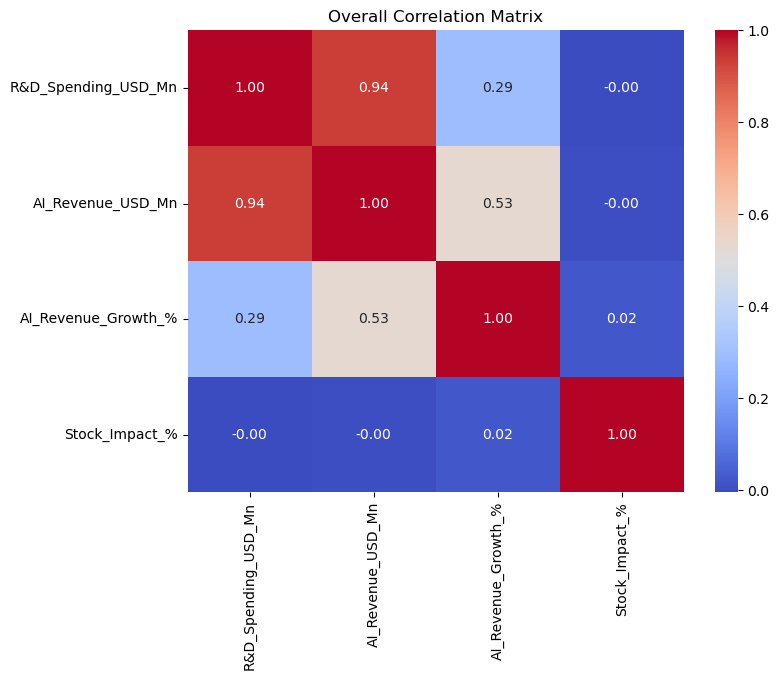

In [34]:
numeric_cols = ['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn', 'AI_Revenue_Growth_%', 'Stock_Impact_%']
plt.figure(figsize=(8, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Overall Correlation Matrix')
plt.show()

### Do companies with higher average R&D spending also have a higher average stock impact?

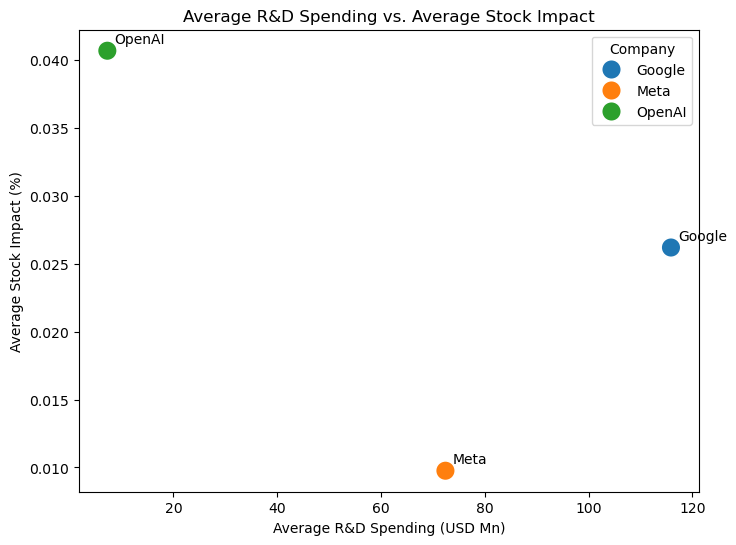

In [35]:
company_avgs = df.groupby('Company')[['R&D_Spending_USD_Mn', 'Stock_Impact_%']].mean()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='R&D_Spending_USD_Mn', y='Stock_Impact_%', hue=company_avgs.index, data=company_avgs, s=200)
for i, txt in enumerate(company_avgs.index):
        plt.annotate(txt, (company_avgs['R&D_Spending_USD_Mn'].iloc[i], company_avgs['Stock_Impact_%'].iloc[i]), xytext=(5, 5), textcoords='offset points')
plt.title('Average R&D Spending vs. Average Stock Impact')
plt.xlabel('Average R&D Spending (USD Mn)')
plt.ylabel('Average Stock Impact (%)')
plt.show()

### How do the distributions of R&D spending, AI revenue, and stock impact differ by company?

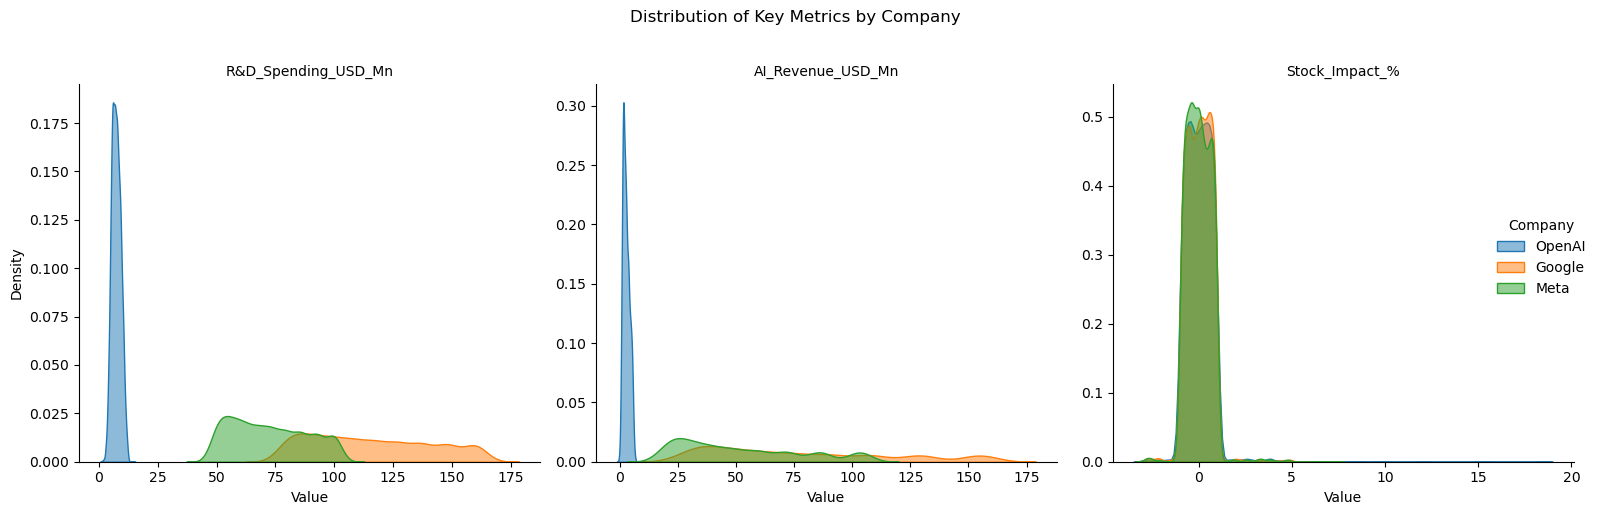

In [36]:
df_melt = pd.melt(df, id_vars=['Company'], value_vars=['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn', 'Stock_Impact_%'],
                      var_name='Metric', value_name='Value')
g = sns.FacetGrid(df_melt, col='Metric', hue='Company', col_wrap=3, height=5, sharex=False, sharey=False)
g.map(sns.kdeplot, 'Value', fill=True, alpha=.5)
g.add_legend()
g.set_axis_labels('Value', 'Density')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of Key Metrics by Company', y=1.02)
plt.tight_layout()
plt.show()